In [2]:
import numpy as np
from Tensor.matrix import Tensor
from nn.linear import Node , Layer , Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from Optimizer.base import GD


In [74]:
# preparing dataset from using sklearn datasets 
# visualize it using matplotlib.pyplot 
x , y = make_blobs(n_samples=400, n_features=2,shuffle=True)
y = np.where(y > 1 , 1, -1)
print('output data is : ', y)
print('input x data is : ', x)

output data is :  [-1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1
 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1
 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1  1 -1  1
 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1
 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1 -1  1 -1
 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1
 -1 -1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1 -1  1
 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1  1  1  1
 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1
  1 -1 -1  1  1 -1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1  1 -1 -1
 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1

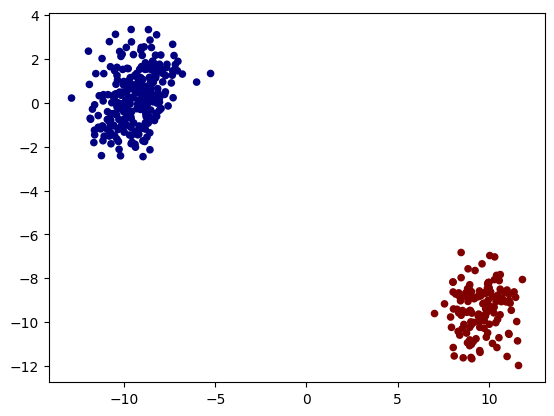

In [38]:
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet') # this is how data is distributed along the x and y axis


In [75]:
# building nueral network model using Dense layer
model_nn = Dense(n_input=2 , list_layers=[10 , 20, 30  , 1])
print(model_nn)
params = model_nn.parameters()
layer1_param , layer2_params , layer3_params , layer4_params = params
print(len(layer1_param))
y = np.expand_dims(a=y,axis=1)
y.shape

Dense of [Layer of [LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,)], Layer of [LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,)], Layer of [LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,), LinearNode(2,)

(400, 1)

In [109]:
# train model_nn
def loss(batch_size=None):
    x_ = Tensor(value=x)
    y_ = Tensor(value=y)
    scores = model_nn(x=x)
    print("shape of scores ",scores.shape())
    print("shape of y is ",y.shape)
    losses = scores.mse(other=y_)
    losses.backward()
    losses.visualize_graph("linear_model")
   
    print(losses)
loss()

shape of scores  (400, 1)
shape of y is  (400, 1)
rendered
Tensor(data:222.35965994681683,grad:1.0)


In [114]:
params = model_nn.parameters()
parameter = []
for ls in params:
    parameter.append(ls[0])
    parameter.append(ls[1])
print(len(parameter))
print(parameter)

8
[Tensor(data:[[-2.0419502  -0.47212008]
 [ 0.41222119  1.77433489]
 [ 1.28198963  1.92449566]
 [ 0.8496755  -1.15796517]
 [ 0.58165432  1.20316217]
 [-0.05365038  0.35217503]
 [-1.74761172 -0.05839945]
 [ 0.33328409 -0.40791891]
 [-0.11890035 -0.04989812]
 [ 0.96977292  2.0209754 ]],grad:[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]), Tensor(data:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],grad:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]), Tensor(data:[[-0.99563094  0.27967691]
 [ 0.26983863 -0.53211092]
 [ 1.41322474  0.40281818]
 [ 0.51719803  0.29029318]
 [ 1.01897617 -1.62400746]
 [-0.03839006 -1.72760696]
 [ 0.72733789  0.2036233 ]
 [-0.75854531  1.31187498]
 [-1.0111247   0.12051954]
 [ 1.29949317 -0.55197015]
 [-1.26118308 -0.81207519]
 [ 0.16805124 -1.45698541]
 [-0.39856901  0.31780478]
 [-0.92323658  0.76558997]
 [-0.01187021 -1.63949848]
 [ 2.12623821  0.63650189]
 [ 1.15858034 -0.42576387]
 [ 1.43261961 -0.70014337]
 [-1.90890529 -0.03146971]
 [-0.425

In [120]:
for k in range(100):
    
    # forward
    total_loss = loss()
    
    # backward
    # model_nn.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in parameter:
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


    

shape of scores  (400, 1)
shape of y is  (400, 1)
rendered
Tensor(data:222.35965994681683,grad:1.0)


AttributeError: 'NoneType' object has no attribute 'backward'